In [32]:
from sklearn.datasets import make_moons
from hdbscan.validity import validity_index
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import os
import hdbscan
import pandas as pd
from helper_functions import subset, find_nuclei_centroids
import seaborn as sns
from scipy.spatial import Voronoi, voronoi_plot_2d
from read_roi import read_roi_zip

%matplotlib inline


## HDBSCAN explained

In [13]:
fig_dir = r"C:\Users\geertoosterbroek\Documents\Thesis\Images"


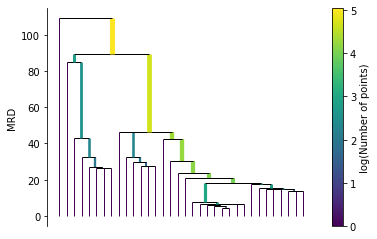

In [15]:
data = pd.read_csv(r"C:\Users\geertoosterbroek\Documents\Thesis\Data\507_s7\507_s7 mRNA counts.csv")
# data = data.iloc[:,1:]
data = subset(data, x_bounds=(3000,3200), y_bounds=(1000,1200))
# data = subset(data)
#%%
data['target'].value_counts()
#%%
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True)
clusterer.fit(data[["x", "y"]].to_numpy())
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
plt.ylabel("MRD")
plt.savefig(os.path.join(fig_dir,"HDBSCAN dendogram.png"), bbox_inches = 'tight', dpi = 300)

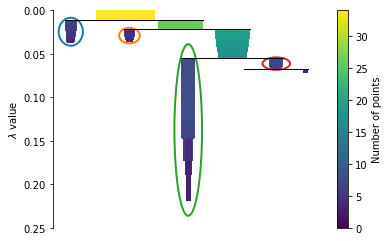

In [23]:
clusterer.condensed_tree_.plot(select_clusters=True,selection_palette=sns.color_palette())
plt.gca().set_ylim(bottom=0.25)
plt.savefig(os.path.join(fig_dir,"HDBSCAN condensed tree.png"), bbox_inches = 'tight', dpi = 300)

## Motivation SEDEC+

In [33]:
input_directory = r"C:\Users\geertoosterbroek\Documents\Thesis\Data\507_s7\input"
cell_rois = read_roi_zip(input_directory + r"\507_s7_all_cell_rois.zip")
nuclei_rois = read_roi_zip(os.path.join(input_directory, "507_sc7_all_nuclei_RoiSet_crop.zip"))

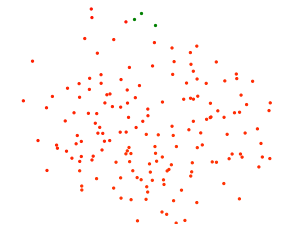

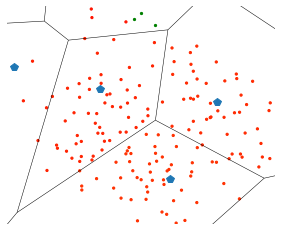

In [38]:
output_dir = r"C:\Users\geertoosterbroek\Documents\Thesis\Data\507_s7\output\subset"
nuc_map_data = pd.read_csv(os.path.join(output_dir, "nucmap_labelled_data.csv"), index_col=0)                         
fig, ax = plt.subplots()
nuc_map_data.plot.scatter(x='x', y='y', c='nc_labels', colormap='jet', ax=ax, s=5)
ax.collections[-1].colorbar.remove()
ax.axis((3300,3380,1250,1320))
ax.scatter(3340, 1318, c='g', s=5)
ax.scatter(3338, 1316, c='g', s=5)
ax.scatter(3344, 1314, c='g', s=5)
ax.set_axis_off()
# fig.savefig(os.path.join(fig_dir, "example_cluster.png"),
#             bbox_inches = 'tight', dpi=500)
centroids = find_nuclei_centroids(nuclei_rois)
vor = Voronoi(centroids)
fig, ax = plt.subplots()
nuc_map_data.plot.scatter(x='x', y='y', c='nc_labels', colormap='jet', ax=ax, s=5)
ax.collections[-1].colorbar.remove()
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=False, line_width=0.5)
ax.plot(vor.points[:,0], vor.points[:,1], '.', marker="p", markersize=8)
ax.axis((3300,3380,1250,1320))
ax.scatter(3340, 1318, c='g', s=5)
ax.scatter(3338, 1316, c='g', s=5)
ax.scatter(3344, 1314, c='g', s=5)
ax.set_axis_off()
# fig.savefig(os.path.join(fig_dir, "split_cluster.png"),
#             bbox_inches = 'tight', dpi=500)

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

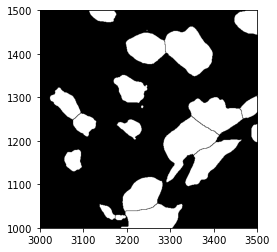

In [7]:
datafile = r"C:\Users\geertoosterbroek\Documents\Thesis\Data\507_s7\Channel images\zoomed_dapi.tif"
img = plt.imread(datafile)
plt.imshow(img, zorder=0, extent=[3000,3500,1000,1500], cmap='gray')

img

## Downside of most cluster metrics

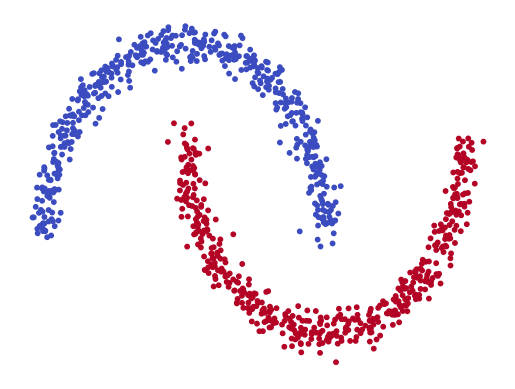

0.43741362432851244
0.33415056492395384


In [6]:
X, y = make_moons(n_samples=500, noise=0.05)

plt.scatter(X[:,0], X[:,1], c=y,  cmap='coolwarm', s=10, label=y)
fig_dir = r"C:\Users\geertoosterbroek\Documents\Thesis\Images"
plt.axis('off')
plt.savefig(os.path.join(fig_dir, "moon_example.png"),
            bbox_inches = 'tight', dpi=1000)
plt.show()

print(validity_index(X, y))
print(silhouette_score(X, y))